<a href="https://colab.research.google.com/github/Daisy-duk3/Daisy-duk3/blob/main/LSTM_basis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# Description: This program uses an articifial recurrent neural network called Long Short Term Memory or (LSTM)
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 60 days stock price.

In [76]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [77]:
#get the stock quote
df = web.DataReader('AAPL', data_source='av-daily', start='2016-01-01', end='2024-04-08', api_key='SI0MINO8NE8FZDI8')
#Show the data
df

,open,high,low,close,volume
2016-01-04,102.61,105.368,102.0000,105.35,67649387
2016-01-05,105.75,105.850,102.4100,102.71,55790992
2016-01-06,100.56,102.370,99.8700,100.70,68457388
2016-01-07,98.68,100.130,96.4300,96.45,81094428
2016-01-08,98.55,99.110,96.7600,96.96,70798016
...,...,...,...,...,...
2024-04-01,171.19,171.250,169.4750,170.03,43772506
2024-04-02,169.08,169.340,168.2302,168.84,49013991
2024-04-03,168.79,170.680,168.5800,169.65,45571129
2024-04-04,170.29,171.920,168.8200,168.82,53355055


Text(0, 0.5, 'Close Price USD($)')

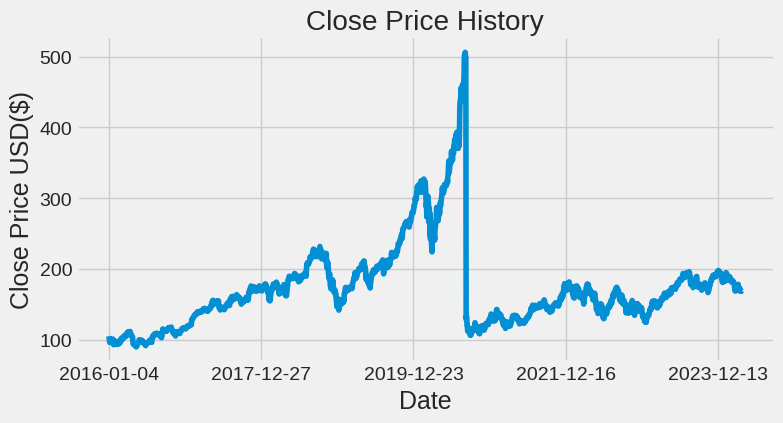

In [78]:
#Visualize the closing price history
from matplotlib import pyplot as plt
df['close'].plot(kind='line', figsize=(8, 4), title='Close Price History')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)

In [79]:
#Get the number of rows and columns in the data set
df.shape

(2078, 5)

In [80]:
#Create a new dataframe with only the 'Close column'
data = df.filter(['close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8 )

training_data_len

1663

In [81]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03610343],
       [0.02975346],
       [0.02491882],
       ...,
       [0.19076368],
       [0.18876729],
       [0.19059531]])

In [82]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print ()

[array([[0.03610343],
       [0.02975346],
       [0.02491882],
       [0.01469633],
       [0.01592303],
       [0.01969934],
       [0.02313891],
       [0.01695731],
       [0.02208058],
       [0.01633193],
       [0.01520144],
       [0.01551413],
       [0.01433554],
       [0.02665063],
       [0.02188815],
       [0.02321106],
       [0.0074083 ],
       [0.00901984],
       [0.01683704],
       [0.01464823],
       [0.00995791],
       [0.0144558 ],
       [0.01505713],
       [0.00885147],
       [0.01123271],
       [0.01118461],
       [0.0094528 ],
       [0.00808178],
       [0.00877931],
       [0.01515334],
       [0.01871317],
       [0.01423933],
       [0.01371016],
       [0.01573061],
       [0.01046302],
       [0.01385448],
       [0.01544197],
       [0.01580277],
       [0.0152736 ],
       [0.02450992],
       [0.02503909],
       [0.02684305],
       [0.03047505],
       [0.02773301],
       [0.02571257],
       [0.02592904],
       [0.02604931],
       [0.02

In [83]:
#Convert the x_train adn y_train to numpy arrays to train LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

In [84]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1603, 60, 1)

In [85]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [86]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [87]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1603/1603 [==============================] - 53s 31ms/step - loss: 0.0053


In [88]:
#Create the testing data set
#Crate a new array containing scaled values from index 15603 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [89]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [90]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [91]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 16ms/step


In [92]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test ) **2 )
rmse

33.93292820721362

<ipython-input-93-7c59ef346fd0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


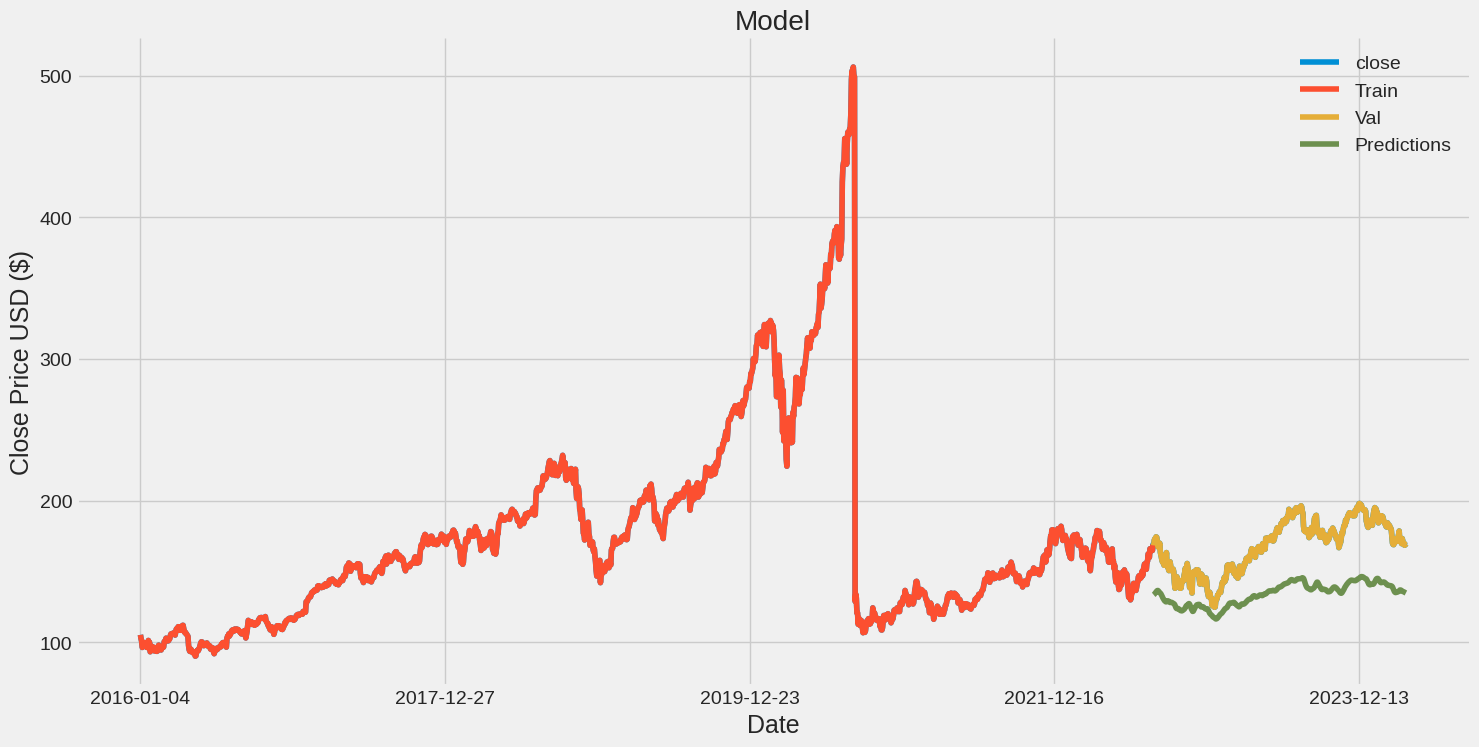

In [93]:
from matplotlib import pyplot as plt

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

# Visualize the data and model
df['close'].plot(kind='line', figsize=(16, 8), title='Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'], label='Train')
plt.plot(valid['close'], label='Val')
plt.plot(valid['predictions'], label='Predictions')
plt.legend(loc='upper right')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


In [94]:
#Show the Valid price and the predicted prices
valid

,close,predictions
2022-08-11,168.49,133.611099
2022-08-12,172.10,133.967957
2022-08-15,173.19,134.521179
2022-08-16,173.03,135.151733
2022-08-17,174.55,135.695694
...,...,...
2024-04-01,170.03,135.839798
2024-04-02,168.84,135.630310
2024-04-03,169.65,135.331375
2024-04-04,168.82,135.103592


In [95]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='av-daily', start='2016-01-01', end='2024-04-07', api_key='SI0MINO8NE8FZDI8')
#Create a new dataframe
new_df = apple_quote.filter(['close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy arrat
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scale price
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 43ms/step
[[134.76987]]


In [96]:
#the actual quote
apple_quote2 = web.DataReader('AAPL', data_source='av-daily', start='2024-04-05', end='2024-04-05', api_key='SI0MINO8NE8FZDI8')
print(apple_quote2['close'])

2024-04-05    169.58
Name: close, dtype: float64
